In [2]:
import requests
import pandas as pd
import logging
import os
from dotenv import load_dotenv
load_dotenv()


True

In [3]:
import requests_cache

s = requests_cache.CachedSession('requests_cache')

In [5]:
deviceCode = 'RBRQUARTZ3BPRZERO207223'


In [6]:
ONC_TOKEN = os.getenv('ONC_TOKEN')

In [7]:
def get_data_from_device(device_code): # date_from, date_to, sensor_category_codes,
    url = 'https://data.oceannetworks.ca/api/scalardata'
    params = {'method': 'getByDevice',
                'token': os.getenv('ONC_TOKEN'),
                'outputFormat': 'object',
                'deviceCode': device_code,
                'dateFrom': '2021-09-10T00:00:00.000Z',
                'sensorCategoryCodes': 'pressure1',
                'resampleType': 'avg',
                'resamplePeriod': 900
                #'dateTo': '2023-11-19T00:00:00.000Z'
                #'dateTo': '2023-09-15T00:00:00.000Z'
                }

    response = requests.get(url=url, params=params)
    print(response)
    df = pd.DataFrame(response.json()['sensorData'][0]['data'])
    df.index = pd.to_datetime(df['sampleTime'])
    df['t'] = (df.index - df.index[0]).total_seconds()
    return df, response

## get the BPR|Zero data downsampled to 15min

In [9]:
df, response = get_data_from_device(deviceCode)
df

<Response [200]>


,count,maxQuality,maxTime,maximum,minQuality,minTime,minimum,qaqcFlag,sampleTime,value,t
sampleTime,,,,,,,,,,,
2021-09-10 00:07:30+00:00,7200,0,2021-09-10T00:00:00.029Z,411.136145,0,2021-09-10T00:14:54.031Z,410.967055,7,2021-09-10T00:07:30.000Z,411.051154,0.0
2021-09-10 00:22:30+00:00,7200,0,2021-09-10T00:15:08.030Z,410.976486,0,2021-09-10T00:29:52.156Z,410.802670,7,2021-09-10T00:22:30.000Z,410.890450,900.0
2021-09-10 00:37:30+00:00,7200,0,2021-09-10T00:30:00.156Z,410.813373,0,2021-09-10T00:44:59.782Z,410.630390,7,2021-09-10T00:37:30.000Z,410.722483,1800.0
2021-09-10 00:52:30+00:00,7200,0,2021-09-10T00:45:12.407Z,410.635343,0,2021-09-10T00:59:54.157Z,410.452745,7,2021-09-10T00:52:30.000Z,410.545283,2700.0
2021-09-10 01:07:30+00:00,7200,0,2021-09-10T01:00:05.407Z,410.459265,0,2021-09-10T01:14:38.408Z,410.280451,7,2021-09-10T01:07:30.000Z,410.370935,3600.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-07-15 12:52:30+00:00,7200,0,2023-07-15T12:45:13.548Z,408.916446,0,2023-07-15T12:58:52.799Z,408.887151,7,2023-07-15T12:52:30.000Z,408.900159,58193100.0
2023-07-15 13:07:30+00:00,7200,0,2023-07-15T13:02:04.673Z,408.900690,0,2023-07-15T13:05:27.429Z,408.882935,7,2023-07-15T13:07:30.000Z,408.891321,58194000.0
2023-07-15 13:22:30+00:00,7200,0,2023-07-15T13:28:36.926Z,408.906079,0,2023-07-15T13:15:31.049Z,408.883908,7,2023-07-15T13:22:30.000Z,408.893735,58194900.0


In [10]:
sensor_infos = []
for sensor in response.json()['sensorData']:
    sensor_info = {k: sensor.get(k, None) for k in ('sensorCategoryCode', 'sensorCode',
                                                    'sensorName', 'unitOfMeasure')}
    sensor_infos.append(sensor_info)
    
pd.DataFrame(sensor_infos)

,sensorCategoryCode,sensorCode,sensorName,unitOfMeasure
0,pressure1,pressure1,AZA Raw Pressure,decibar


In [11]:
response.json()['sensorData']

[{'actualSamples': 64558,
  'data': [{'count': 7200,
    'maxQuality': 0,
    'maxTime': '2021-09-10T00:00:00.029Z',
    'maximum': 411.1361450829922,
    'minQuality': 0,
    'minTime': '2021-09-10T00:14:54.031Z',
    'minimum': 410.9670547323103,
    'qaqcFlag': 7,
    'sampleTime': '2021-09-10T00:07:30.000Z',
    'value': 411.05115433546285},
   {'count': 7200,
    'maxQuality': 0,
    'maxTime': '2021-09-10T00:15:08.030Z',
    'maximum': 410.9764856437469,
    'minQuality': 0,
    'minTime': '2021-09-10T00:29:52.156Z',
    'minimum': 410.802669759841,
    'qaqcFlag': 7,
    'sampleTime': '2021-09-10T00:22:30.000Z',
    'value': 410.890450088897},
   {'count': 7200,
    'maxQuality': 0,
    'maxTime': '2021-09-10T00:30:00.156Z',
    'maximum': 410.8133729728803,
    'minQuality': 0,
    'minTime': '2021-09-10T00:44:59.782Z',
    'minimum': 410.63039040769974,
    'qaqcFlag': 7,
    'sampleTime': '2021-09-10T00:37:30.000Z',
    'value': 410.7224826727298},
   {'count': 7200,
    'max

In [12]:
# filter out pressure drops due to calibration
df.loc[df['value']< 410.0,'value'] = float('nan')
df.loc[df['value']> 412.0,'value'] = float('nan')
df.head()

,count,maxQuality,maxTime,maximum,minQuality,minTime,minimum,qaqcFlag,sampleTime,value,t
sampleTime,,,,,,,,,,,
2021-09-10 00:07:30+00:00,7200,0,2021-09-10T00:00:00.029Z,411.136145,0,2021-09-10T00:14:54.031Z,410.967055,7,2021-09-10T00:07:30.000Z,411.051154,0.0
2021-09-10 00:22:30+00:00,7200,0,2021-09-10T00:15:08.030Z,410.976486,0,2021-09-10T00:29:52.156Z,410.802670,7,2021-09-10T00:22:30.000Z,410.890450,900.0
2021-09-10 00:37:30+00:00,7200,0,2021-09-10T00:30:00.156Z,410.813373,0,2021-09-10T00:44:59.782Z,410.630390,7,2021-09-10T00:37:30.000Z,410.722483,1800.0
2021-09-10 00:52:30+00:00,7200,0,2021-09-10T00:45:12.407Z,410.635343,0,2021-09-10T00:59:54.157Z,410.452745,7,2021-09-10T00:52:30.000Z,410.545283,2700.0
2021-09-10 01:07:30+00:00,7200,0,2021-09-10T01:00:05.407Z,410.459265,0,2021-09-10T01:14:38.408Z,410.280451,7,2021-09-10T01:07:30.000Z,410.370935,3600.0


<Axes: xlabel='sampleTime'>

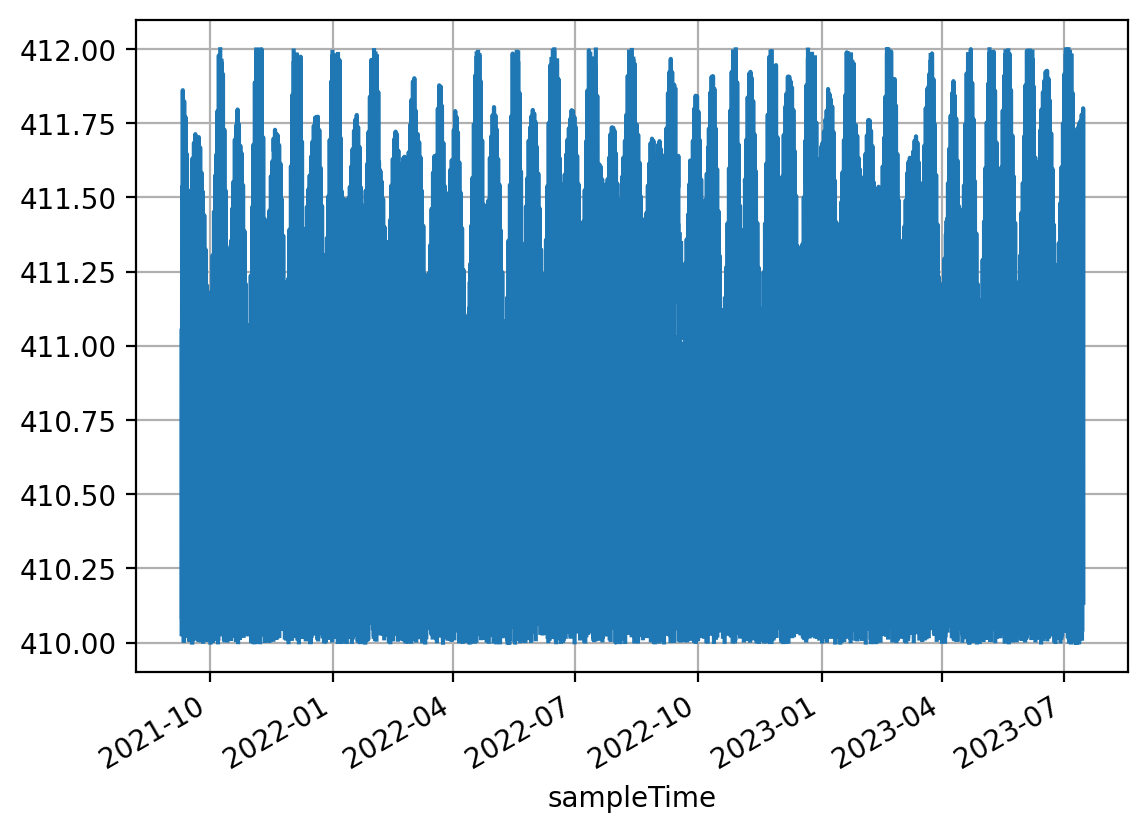

In [ ]:
df['value'].plot(grid=True)

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
#from scipy.stats import linregress

import matplotlib.pyplot as plt

In [ ]:
# Define the exponential decay function with a constant bias
def exponential_func_with_bias(t, A, k, b, C):
    return A * np.exp(k * t) + b*t + C

def exponential_decay_fit(df, p0=None):
    """
    Fit an exponential decay curve with a constant bias to a Pandas DataFrame with 'value' and 't' columns.

    Args:
        df (pd.DataFrame): DataFrame with 'value' and 't' columns.
        p0 (tuple, optional): Initial guess for parameters (A, k, C). If not provided, initial guesses will be determined automatically.
        
    Returns:
        tuple: A tuple containing three elements:
            1. A numpy array representing the fitted exponential decay values.
            2. A tuple of optimized parameters (A, k, C) where:
                - A: Amplitude of the decay.
                - k: Decay rate (negative).
                - C: Constant bias term.

    Raises:
        ValueError: If the DataFrame does not contain 'value' and 't' columns.

    Example:
        df = pd.DataFrame({'t': [0, 1, 2, 3, 4, 5],
                           'value': [100, 73, 54, 40, 29, 21]})
        result, params = exponential_decay_fit_with_bias_and_guess(df)
        print(params)  # (106.30146425934762, -0.3709485189378329, 15.03453660968328)
    """
    # Check if 'value' and 't' columns exist in the DataFrame
    if 'value' not in df.columns or 't' not in df.columns:
        raise ValueError("DataFrame must contain 'value' and 't' columns.")

    # Extract the data from the DataFrame
    t_data = df['t'].values
    value_data = df['value'].values

    # Fit the data to the exponential function with a constant bias
    params, covariance = curve_fit(exponential_func_with_bias, t_data, value_data, p0=p0, maxfev=10000)

    # Get the optimized parameters
    A, k, b, C = params

    # Generate the fitted curve
    fitted_values = exponential_func_with_bias(t_data, A, k, b, C)

    # Plot the original data and the fitted curve
    plt.figure(figsize=(8, 6))
    plt.scatter(t_data, value_data, label='Data', color='blue')
    plt.plot(t_data, fitted_values, label='Fitted Curve', color='red')
    plt.xlabel('Time (s)')
    plt.ylabel('Value')
    plt.legend()
    plt.title('Exponential Decay Fit with Bias')
    plt.show()

    return fitted_values, params


def estimate_decay_rate(df):
    """
    Estimate the decay rate (k) for an exponential decay model using fitting and plot the results.

    Args:
        df (pd.DataFrame): DataFrame with 'value' and 't' columns.
        
    Returns:
        float: Estimated decay rate (k).

    Raises:
        ValueError: If the DataFrame does not contain 'value' and 't' columns.

    Example:
        df = pd.DataFrame({'t': [0, 1, 2, 3, 4, 5],
                           'value': [100, 73, 54, 40, 29, 21]})
        estimated_k = estimate_decay_rate_with_plot(df)
        print(estimated_k)  # Approximately -0.413
    """
    # Check if 'value' and 't' columns exist in the DataFrame
    if 'value' not in df.columns or 't' not in df.columns:
        raise ValueError("DataFrame must contain 'value' and 't' columns.")

    # Extract the data from the DataFrame
    t_data = df['t'].values
    value_data = df['value'].values

    # Take the natural logarithm of the values
    ln_value_data = np.log(value_data)

    # Fit an exponential decay model to the logarithmic data using polyfit
    coeffs = np.polyfit(t_data, ln_value_data, 1)

    # The coefficient is the decay rate (k)
    estimated_k = coeffs[0]

    # Calculate the fitted values
    fitted_values = np.exp(coeffs[1]) * np.exp(estimated_k * t_data)

    # Plot the original data and the fitted curve
    plt.figure(figsize=(8, 6))
    plt.scatter(t_data, value_data, label='Data', color='blue')
    plt.plot(t_data, fitted_values, label='Fitted Curve', color='red')
    plt.xlabel('Time (s)')
    plt.ylabel('Value')
    plt.legend()
    plt.title('Exponential Decay Fit with Estimated k')
    plt.grid(True)
    plt.show()

    return estimated_k



## Find calibrations

In [13]:
url = 'https://data.oceannetworks.ca/api/scalardata'
params = {'method': 'getByDevice',
            'token': os.environ['ONC_TOKEN'],
            'outputFormat': 'object',
            'deviceCode': deviceCode,
            #'rowLimit' : 10000,
            'sensorCategoryCodes': 'systemstatus',
            'dateFrom': '2021-09-09T00:09:30.504Z',
            'fillGaps': 'false'
            }

response = s.get(url=url, params=params)

In [14]:
cal = pd.DataFrame(response.json()['sensorData'][0]['data'])
cal.index = pd.to_datetime(cal['sampleTime'])
cal['t'] = (cal.index - cal.index[0]).total_seconds()
cal

,qaqcFlag,sampleTime,value,t
sampleTime,,,,
2021-09-13 23:35:29.169000+00:00,0,2021-09-13T23:35:29.169Z,0.0,0.000000e+00
2021-09-13 23:36:39.584000+00:00,0,2021-09-13T23:36:39.584Z,1.0,7.041500e+01
2021-09-13 23:47:41.801000+00:00,0,2021-09-13T23:47:41.801Z,0.0,7.326320e+02
2021-09-28 23:35:39.584000+00:00,0,2021-09-28T23:35:39.584Z,1.0,1.296010e+06
2021-09-28 23:46:41.776000+00:00,0,2021-09-28T23:46:41.776Z,0.0,1.296673e+06
...,...,...,...,...
2023-07-03 16:06:25.970000+00:00,0,2023-07-03T16:06:25.970Z,0.0,5.682426e+07
2023-07-06 22:51:02.485000+00:00,0,2023-07-06T22:51:02.485Z,0.0,5.710773e+07
2023-07-06 22:52:12.239000+00:00,0,2023-07-06T22:52:12.239Z,1.0,5.710780e+07


In [15]:
# calibration when value == -1
cal = cal[['value','t']].diff().shift(-1)
cal = cal.loc[cal['value'] == -1]
cal

,value,t
sampleTime,,
2021-09-13 23:36:39.584000+00:00,-1.0,662.217
2021-09-28 23:35:39.584000+00:00,-1.0,662.192
2021-10-13 23:35:39.584000+00:00,-1.0,667.713
2021-10-22 20:20:02.843000+00:00,-1.0,662.230
2021-11-05 17:14:17.228000+00:00,-1.0,662.180
...,...,...
2023-05-20 15:56:20.690000+00:00,-1.0,667.681
2023-06-03 15:55:12.737000+00:00,-1.0,667.674
2023-06-18 15:55:18.230000+00:00,-1.0,662.224


In [16]:
def datetime2onc(dt):
    return dt.strftime('%Y-%m-%dT%H:%M:%S.%f')[:-3]+'Z'

In [17]:
cals = {}

for ct in cal.index:
    print(ct)
    dt = pd.Timedelta('900s')
    t_start = datetime2onc(ct)
    t_end = datetime2onc(ct+dt)
    
    url = 'https://data.oceannetworks.ca/api/scalardata'
    params = {'method': 'getByDevice',
                'token': os.environ['ONC_TOKEN'],
                'outputFormat': 'object',
                'deviceCode':deviceCode ,
                'dateFrom': t_start,
                'dateTo': t_end,
                #'sensorCategoryCodes': 'pressure1,pressure4',
                #'resampleType': 'avg',
                #'resamplePeriod': 60, #900
                #'dateTo': '2023-09-15T00:00:00.000Z'
                }
    
    response = s.get(url=url, params=params)
    
    cal_dat = pd.DataFrame()
    #dfs = [pd.DataFrame(col['data']) for col in ]

    for col in response.json()['sensorData']:
        cal_dat[col['sensorName']] = pd.DataFrame(col['data'])['value']

    cal_dat['sample time'] = pd.to_datetime(pd.DataFrame(col['data'])['sampleTime'])
    cal_dat.index = (cal_dat['Instrument Clock'] - cal_dat['Instrument Clock'][0])*(24*3600) #.dt.total_seconds()
    #cal_dat = pd.DataFrame([col['value'] for col in dfs], columns=['a','b'])
    #cal_dat = pd.DataFrame(response.json()['sensorData'][0]['data'])
    #cal_dat.index = pd.to_datetime(cal_dat['sampleTime'])
    #cal_dat['t'] = (cal_dat.index - cal_dat.index[0]).total_seconds()
    
    # calibrated pressure timeseries
    cals[ct] = (cal_dat['AZA Raw Pressure']-cal_dat['AZA Reference Pressure'])

2021-09-13 23:36:39.584000+00:00
2021-09-28 23:35:39.584000+00:00
2021-10-13 23:35:39.584000+00:00
2021-10-22 20:20:02.843000+00:00
2021-11-05 17:14:17.228000+00:00
2021-11-20 17:13:11.728000+00:00
2021-11-25 11:20:14.715000+00:00
2021-12-06 11:19:06.720000+00:00
2021-12-21 11:19:12.207000+00:00
2022-01-05 11:19:06.705000+00:00
2022-01-20 11:19:12.205000+00:00
2022-02-04 11:19:06.705000+00:00
2022-02-19 11:19:12.227000+00:00
2022-03-06 11:19:12.206000+00:00
2022-03-21 11:19:12.207000+00:00
2022-04-05 11:19:12.205000+00:00
2022-04-05 16:48:27.995000+00:00
2022-04-20 16:47:33.499000+00:00
2022-05-05 16:47:33.497000+00:00
2022-05-20 16:47:33.498000+00:00
2022-06-04 16:47:28.008000+00:00
2022-06-08 20:57:24.806000+00:00
2022-06-15 00:24:55.387000+00:00
2022-06-30 00:24:00.890000+00:00
2022-07-15 00:24:00.891000+00:00
2022-07-30 00:24:00.890000+00:00
2022-08-05 21:41:34.094000+00:00
2022-08-14 21:40:37.104000+00:00
2022-08-29 21:40:37.103000+00:00
2022-09-12 22:18:31.330000+00:00
2022-09-13

KeyboardInterrupt: 

In [ ]:
a = pd.DataFrame() #index=pd.Index(range(1790))
keys = list(cals.keys())
for key in keys:
    #print(len(cals[key]))
    a[key] = cals[key].iloc[0:-1].reset_index(drop=True)

#a = cals[keys[0]]
#a.reindex_like(pd.NumericIndex(np.arange(0, 600, 0.125)))

In [34]:
a

,2021-09-13 23:36:39.584000+00:00,2021-09-28 23:35:39.584000+00:00,2021-10-13 23:35:39.584000+00:00,2021-10-22 20:20:02.843000+00:00,2021-11-05 17:14:17.228000+00:00,2021-11-20 17:13:11.728000+00:00,2021-11-25 11:20:14.715000+00:00,2021-12-06 11:19:06.720000+00:00,2021-12-21 11:19:12.207000+00:00,2022-01-05 11:19:06.705000+00:00,...,2023-04-19 01:50:42.269000+00:00,2023-05-04 01:50:42.254000+00:00,2023-05-19 01:50:42.254000+00:00,2023-05-20 12:10:21.930000+00:00,2023-05-20 13:40:10.756000+00:00,2023-05-20 15:56:20.690000+00:00,2023-06-03 15:55:12.737000+00:00,2023-06-18 15:55:18.230000+00:00,2023-07-03 15:55:18.229000+00:00,2023-07-06 22:52:12.239000+00:00
0.000000,401.878943,401.507324,401.371124,402.050154,401.372344,401.164055,401.175216,401.592363,401.454803,401.802199,...,399.602476,400.101772,400.276914,400.178210,399.267601,399.161446,399.625126,399.274729,399.147488,401.899457
0.015625,401.875279,401.510731,401.367728,402.050146,401.375642,401.163959,401.184850,401.590571,401.450570,401.800887,...,399.600231,400.101061,400.282073,400.174400,399.268062,399.165380,399.626860,399.276156,399.148318,401.898182
0.031250,401.877962,401.509628,401.371355,402.049730,401.372150,401.165146,401.184533,401.590915,401.453481,401.797889,...,399.602774,400.103336,400.280503,400.178390,399.268989,399.164523,399.623747,399.275194,399.147682,401.897605
0.046875,401.876235,401.506209,401.372002,402.047031,401.375190,401.167130,401.179944,401.590599,401.450801,401.802268,...,399.601725,400.098900,400.279624,400.174980,399.266734,399.162825,399.625160,399.278442,399.147575,401.897906
0.062500,401.877316,401.509879,401.368845,402.047866,401.370290,111.948019,401.180715,114.223517,401.455865,119.447018,...,399.601339,400.102659,400.283096,400.175016,399.270522,399.162854,149.425202,399.274700,399.147693,401.900651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112.375000,401.907177,401.535440,401.437672,402.085329,401.538813,401.274310,401.225630,401.512871,401.403849,401.749716,...,399.662734,400.158422,400.321265,400.003621,NaN,399.260257,399.762921,399.372778,399.275022,NaN
112.390625,401.910650,401.533290,401.435327,402.085049,401.542419,401.274465,401.226911,401.517010,401.403283,401.752370,...,399.664307,400.163623,400.323027,400.003710,NaN,399.267227,399.765503,399.367706,399.277567,NaN
112.406250,401.906924,401.537482,401.435666,402.085499,401.540509,401.277184,401.225601,401.514184,401.403366,401.750545,...,399.665705,400.160348,400.320385,400.002630,NaN,399.262011,399.765264,399.370915,399.275884,NaN
112.421875,401.907332,401.533654,401.435048,402.085456,401.541655,401.272884,401.225729,401.515695,401.405153,401.753480,...,399.664530,400.158887,400.324503,400.001135,NaN,399.262455,399.762089,399.371515,399.277547,NaN


In [33]:
# take care of 8 Hz sample rate
a.index = a.index/8

<Axes: xlabel='Time after start of calibration (s)', ylabel='Transfer Pressure  - Reference Pressure (dbar)'>

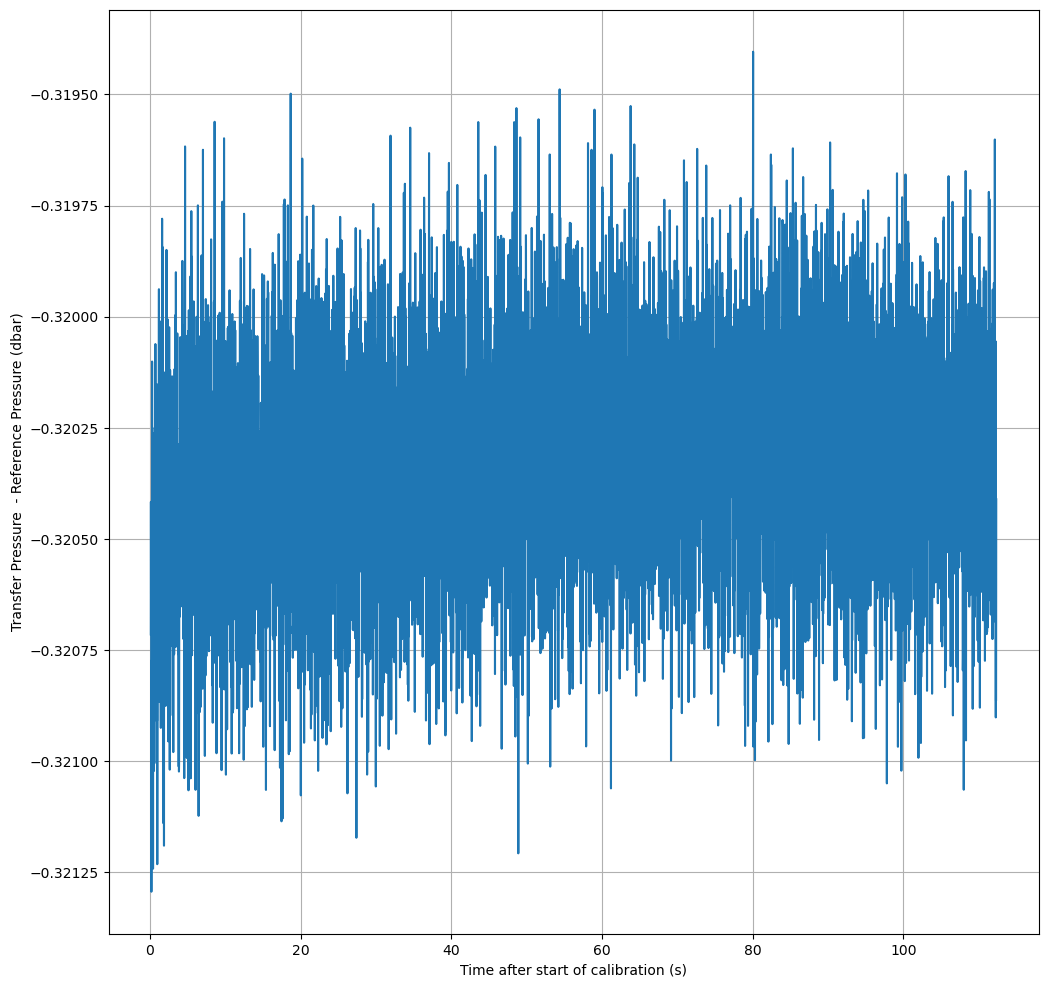

In [35]:
b = a.rolling(16, center=True).mean()#.iloc[800:660*8,:]
b = b.loc[:,b.max()< 100]
b.plot(figsize=(12,12), grid=True, legend=False,
            xlabel='Time after start of calibration (s)',
            ylabel='Transfer Pressure  - Reference Pressure (dbar)')

### get BPR data from different locations

In [21]:
def getData(locationCode, deviceCategoryCode, sensorCategoryCodes = 'pressure', dateFrom = '2009-08-01T00:00:00.000Z', session = None):

    url = 'http://data.oceannetworks.ca/api/scalardata'

    params = {
        'method': 'getByLocation',
        'token': os.environ['ONC_TOKEN'],
        'deviceCategoryCode': deviceCategoryCode,
        'locationCode': locationCode,
        'sensorCategoryCodes': sensorCategoryCodes,
        'resamplePeriod': 900,
        'resampleType': 'avgMinMax',
        'dateFrom': dateFrom,
    }
    
    dfs = []

    while 1:
        print(params['dateFrom'])
        if session:
            r = session.get(url, params=params)
        else:
            r = requests.get(url, params=params)
            
        df = pd.DataFrame(r.json()['sensorData'][0]['data'])
        df.index = pd.DatetimeIndex(df['sampleTimes'])
        dfs.append(df)
        try:
            params['dateFrom'] = r.json()['next']['parameters']['dateFrom']
        except TypeError:
            break
        
    return pd.concat(dfs)

In [42]:
#def get_data_by_location(device_category_code='BPR', location_code = 'MEFS', sensor_category_codes='pressure1'): # date_from, date_to, sensor_category_codes,

bpr_z = getData('NCBC.P1', 'BPR', sensorCategoryCodes='pressure1', dateFrom='2021-09-10', session=s)

2021-09-10


In [43]:
ncbc = getData('NCBC', 'BPR', sensorCategoryCodes='pressure', dateFrom='2021-09-10', session=s)


2021-09-10
2024-07-17T18:07:30.000Z


<Axes: xlabel='sampleTimes'>

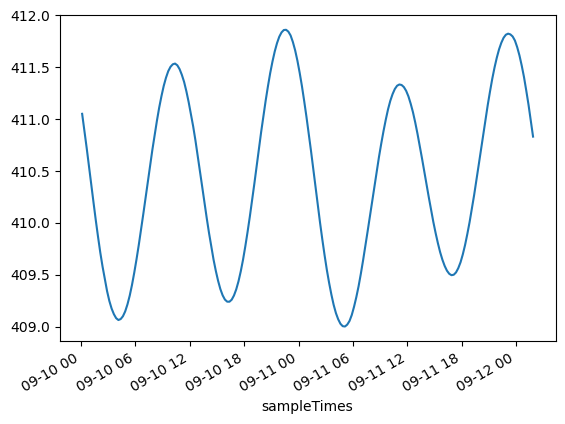

In [44]:
# show the calibration jumps from BPRZero ambient pressure
bpr_z['values'][0:200].plot()

In [45]:
# clean BPRZero pressure sensor values of calibration jumps

bpr_z['cleaned'] = bpr_z['values'].copy()
bpr_z.loc[bpr_z['cleaned']< 409,'cleaned'] = float('nan')

Text(0.5, 1.0, 'NCBC vs BPR Zero')

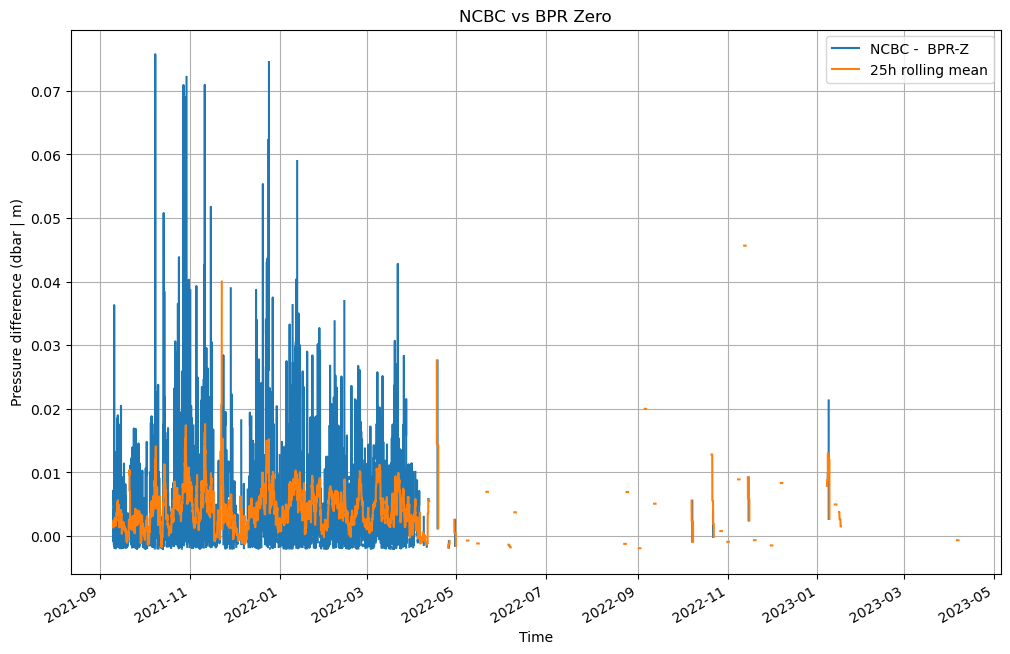

In [52]:
# NCBC comparison
# get NCBC for BPRZero dates and subtract BPRzero pressure
ec_diff = (ncbc['values'].reindex_like(bpr_z['cleaned'])-bpr_z['cleaned'])

ec_diff = ec_diff - ec_diff.iloc[0]
ec_diff[ec_diff > 0.2] = float('nan')
ec_diff[ec_diff < -0.002] = float('nan')

ax = ec_diff.plot(grid=True, figsize=(12,8), label='NCBC -  BPR-Z')
ec_diff.rolling('25h', center=True).mean().plot(ax=ax,grid=True, figsize=(12,8),label='25h rolling mean')

# adjust the calibrations to fit the drift curve at the beginning (exponential part)
#(-1*(cal - cal.iloc[0]) - 0.02).plot(ax = ax, figsize=(12,8), grid=True, marker='.', label='Calibration')

ax.set_xlabel('Time')
ax.set_ylabel('Pressure difference (dbar | m)')
ax.legend()
ax.set_title('NCBC vs BPR Zero')

Text(0.5, 1.0, 'NCBC vs BPR Zero')

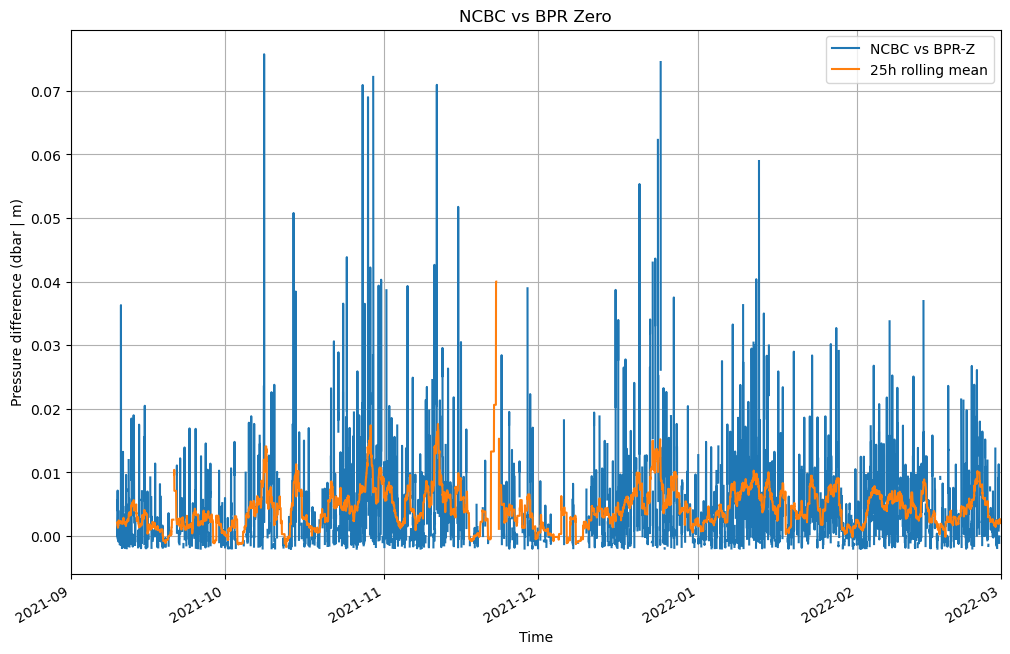

In [53]:
# NCBC zoom
# get NCBC for BPRZero dates and subtract BPRzero pressure
ec_diff = (ncbc['values'].reindex_like(bpr_z['cleaned'])-bpr_z['cleaned'])

ec_diff = ec_diff - ec_diff.iloc[0]
ec_diff[ec_diff > 0.2] = float('nan')
ec_diff[ec_diff < -0.002] = float('nan')
ax = ec_diff.plot(grid=True, figsize=(12,8), label='NCBC vs BPR-Z')
ec_diff.rolling('25h', center=True).mean().plot(ax=ax,grid=True, figsize=(12,8),label='25h rolling mean')

#(-1*(cal - cal.iloc[0]) - 0.02).plot(ax = ax, figsize=(12,8), grid=True, marker='.',markersize=12.5, label='Calibration')

ax.set_xlabel('Time')
ax.set_xlim(['2021-09-01 00:00','2022-03-01 00:00'])
ax.set_ylabel('Pressure difference (dbar | m)')
ax.legend()
ax.set_title('NCBC vs BPR Zero')

## get archive raw data via onc client library

In [75]:
from dotenv import load_dotenv
load_dotenv()
import os

onc = ONC(token=os.getenv('ONC_TOKEN'))

In [78]:
params = {'outputFormat': 'object',
                'deviceCode': deviceCode,
                'dateFrom': '2022-04-05T00:00:00.000Z',
                'dateTo': '2022-04-06T00:00:00.000Z'
                #'dateTo': '2023-09-15T00:00:00.000Z'
                }
                
data = onc.getDirectRawByDevice(params, allPages=True)

Data quantity is greater than the row limit and will be downloaded in multiple pages.


TypeError: list indices must be integers or slices, not str

In [ ]:
def get_raw_data_from_device(device_code): # date_from, date_to, sensor_category_codes,
    onc.get
    params = {'method': 'getByDevice',
                'token': os.getenv('ONC_TOKEN'),
                'outputFormat': 'object',
                'deviceCode': device_code,
                'dateFrom': '2022-04-05T00:00:00.000Z',
                'dateTo': '2022-04-06T00:00:00.000Z'
                #'dateTo': '2023-09-15T00:00:00.000Z'
                }

    response = requests.get(url=url, params=params)
    print(response)
    #df = pd.DataFrame(response.json()['sensorData'][0]['data'])
    #df.index = pd.to_datetime(df['sampleTime'])
    #df['t'] = (df.index - df.index[0]).total_seconds()
    return response

In [68]:
r = get_raw_data_from_device(deviceCode)

<Response [200]>


In [70]:
df = pd.DataFrame(r.json()['data'])
df.tail()

,lineType,rawData,sampleTime
99995,,"2022-04-05 03:28:07.875, 5.666609297557110e+00...",2022-04-05T03:28:19.415Z
99996,,"2022-04-05 03:28:08.000, 5.666600203202147e+00...",2022-04-05T03:28:19.540Z
99997,,"2022-04-05 03:28:08.125, 5.666618391911960e+00...",2022-04-05T03:28:19.666Z
99998,,"2022-04-05 03:28:08.250, 5.666582014491879e+00...",2022-04-05T03:28:19.791Z
99999,,"2022-04-05 03:28:08.375, 5.666618391911960e+00...",2022-04-05T03:28:19.916Z


In [ ]:
df.loc[df['rawData']

In [58]:
df

,0
0,"2022-04-04 23:59:48.500, 5.703713321518759e+00..."
1,"2022-04-04 23:59:48.625, 5.703722415410835e+00..."
2,"2022-04-04 23:59:48.750, 5.703704227626568e+00..."
3,"2022-04-04 23:59:48.875, 5.703695133734265e+00..."
4,"2022-04-04 23:59:49.000, 5.703722415410835e+00..."
...,...
99995,"2022-04-05 03:28:07.875, 5.666609297557110e+00..."
99996,"2022-04-05 03:28:08.000, 5.666600203202147e+00..."
99997,"2022-04-05 03:28:08.125, 5.666618391911960e+00..."
99998,"2022-04-05 03:28:08.250, 5.666582014491879e+00..."
